## Exercise 3.2

In [76]:
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import root

# Set traditional parameters
S = 80
β = 0.96**(80/S)
α = 0.35
A = 1
σ = 3
δ = 1 - (1-0.05)*(80/S)


# Return on labor
def wf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    w = (1-α)*A*(b/n)**α
    return(w)

# Return on capital
def rf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    r = α*A*(n/b)**(1-α)-δ
    return(r)


# Uprime
def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000

def system(bvec):
    wc = wf(bvec, nvec)
    rc = rf(bvec, nvec)
    Sol = []
    
    #For the 1st guy
    # Need a guess : b0 = 0
    #vp1 = up(w*nvec[0] - b2) - β*(1+r)*up(w*nvec[1] + (1+ r)*b2-b3)

    
    # Starting at s=2, until s-2
    for i in range(1,S-2):
        j = i-1
        #print("Range ", i, 'out of ', np.shape(bvec))
        bi = bvec[j]
        bii = bvec[j+1]
        biii = bvec[j+2]
        ni = nvec[i]
        nii = nvec[i+1]
        Soli = uprime(wc*ni + (1+rc)*bi - bii) - β*(1+rc)*uprime(wc*nii + (1+rc)*bii - biii)
        Sol.append(Soli)

    #print(Sol)
    ## One before last guy
    bi = bvec[77]
    bii = bvec[78]
    ni = nvec[78]
    nii = nvec[79]
    Soli = uprime(wc*ni + (1+rc)*bi - bii) - β*(1+rc)*uprime(wc*nii + (1+rc)*bii)
    Sol.append(Soli)
    
    ## Last guy
    bi = bvec[78]
    ni = nvec[79]
    Soli = uprime(wc*ni + (1+rc)*bi)
    Sol.append(Soli)
    
    #print("Sol is ", Sol)
    return(Sol)



def solve(bvec_guess):
    
    print("running solve")
    b_ss = root(system, bvec_guess).x
    
    c_ss = np.empty(S)
    c_ss[0] = wf(b_ss, nvec) - b_ss[0]
    for i in range(1,S-1):
        c_ss[i] = wf(b_ss, nvec) - b_ss[i] + b_ss[i-1]*(1+rf(bvec, nvec))
    
    print("b_ss is ", b_ss)
    print("c_ss is ", c_ss)

    #K_ss = np.sum(b_ss)
    
    #c_ss = np.empty_like(b_ss)
    #wc = w(b_ss, nvec)
    #rc = r(b_ss, nvec)
    
    #L = np.sum(nvec)
    
    #for i in range(S-1):
    #    c_ss[i] = nvec[i]*wc + (1+rc)*b_ss[i-1] - b_ss[i]
    return b_ss, c_ss #, wc, rc, K_ss, L
    


def get_SS(params, bvec_guess, SS_graphs):
    nvec, A, α, δ, β, S = params

    
    start_time = time.clock()
    
    # Solve for the optimal c, b
    b_ss, c_ss = solve(bvec_guess)
    
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    
    # Compute Euler Error
    r_ss = rf(b_ss, nvec)
    w_ss = wf(b_ss, nvec)
    
    EulErr_ss = np.zeros(S-1)
    for i in range(0, S-2):
        EulErr_ss[i] = uprime(w_ss*nvec[i] - b_ss[i] - b_ss[i+1]) - β*(1+r_ss)*uprime(w_ss*nvec[i] + (1 + r_ss)*b_ss[i] - b_ss[i+1])
    
    EulErr_ss[S-2] = uprime(w_ss*nvec[S-2] + (1 + r_ss)* b_ss[S-3])
 
    ss_time = time.clock() - start_time # Place at end of get_SS()
    print('It took %1.3s seconds to solve the OLG model' % ss_time)
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 
    'EulErr_ss': EulErr_ss, 
    'ss_time': ss_time}
    

    return ss_output

In [77]:
bvec = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

print(bvec.shape)
np.sum(bvec)

(79,)


11.399999999999997

In [80]:
S= 80
nvec = np.ones(S)
index = round(2*S/3)+1
nvec[index:] = 0.2
params = nvec, A, α, δ, β, S
result = get_SS(params, bvec, False)

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
running solve
b_ss is  [-0.01  0.1   0.2   0.23  0.25  0.23  0.2   0.1  -0.01  0.1   0.2   0.23
  0.25  0.23  0.2   0.1  -0.01  0.1   0.2   0.23  0.25  0.23  0.2   0.1
 -0.01  0.1   0.2   0.23  0.25  0.23  0.2   0.1  -0.01  0.1   0.2   0.23
  0.25  0.23  0.2   0.1  -0.01  0.1   0.2   0.23  0.25  0.23  0.2   0.1
 -0.01  0.1   0.2   0.23  0.25  0.23  0.2   0.1   0.1   0.1   0.1   0.1
  0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
  0.1   0.1   0.1   0.1   0.1   0.1   0.1 ]
c_ss is  [0.37518881 0.24547732 0.36230368 0.52941855 0.56855301 0.62797599
 0.61855301 0.65941855 0.57230368 0.24547732 0.36230368 0.52941855
 0.56855301 0.62797599 0.61855301

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<function matplotlib.pyplot.show(*args, **kw)>

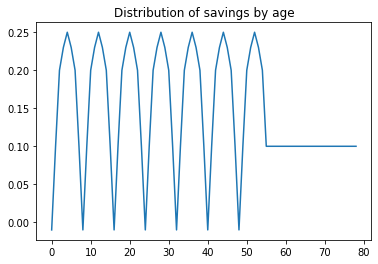

In [79]:
plt.plot(result['b_ss'])
plt.title('Distribution of savings by age')
plt.show